# IE4483 Artificial Intelligence and Data Mining

## Mini Project (Option 2)

### 1. Loading and preparing the data: 

**Import Libraries**

We import the following 4 type of libraries for the following purposes:

1. Pandas: for reading / writing data
2. Matplotlib: for displaying images
3. Tensorflow Keras models: for predicting image result
4. Tensorflow Keras layers: layers for neural network

Layers needed by convolutional neural networks (CNN)
1. Conv2D: basic Convolutional layer to train the model. 
2. Dense: to create fully connected layers, in which every output depends on every input.
3. MaxPooling: to select the maximum element from the region of the feature map covered by the filter.
4. Flatten: to reduce the input data into a single dimension instead of 2 dimensions.

In [1]:
import numpy as np 
import os
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D


2022-10-28 12:27:26.663333: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 2. Data processing:

The training data are labelled as dog.0, dog.1, cat.2 etc. After splitting we will get "dog" and "cat" as the category value of the image. We label dog as "1" and cat as "0" to simplify the results.

We used the **cv2** library to read our image into a gray scale image array.

>cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)

We have images of different sizes. Hence, we use the following code to make them into the same size.

>cv2.resize(img_array, dsize=(80, 80))

The below code shows the processed image.

>plt.imshow(new_img_array,cmap="gray")


In [2]:
# path = "datasets/train/merge_folder"

# for p in os.listdir(path):
#     print(p)
#     category = p.split(".")[0]
#     img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
#     new_img_array = cv2.resize(img_array, dsize=(80, 80))
#     plt.imshow(new_img_array,cmap="gray")
#     break

We declare the training array X and target array Y, where X is the array of pixels and Y is the value 0 or 1 indicating its a dog or cat. The convert function maps category "dog" or "cat" into 1 and 0.

We resize image into 80 X 80 and append the image and category values into X and Y arrays respectively.

In [3]:
# X = []
# y = []
# convert = lambda category : int(category == 'dog')
# def create_test_data(path):
#     for p in os.listdir(path):
#         category = p.split(".")[0]
#         category = convert(category) # convert to 1/0
#         img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
#         new_img_array = cv2.resize(img_array, dsize=(80, 80)) # resize
#         X.append(new_img_array)
#         y.append(category)
    

In [4]:
path_train_cat = "datasets/train/cat"
path_train_dog = "datasets/train/dog"
train_path = "datasets/train"
convert = lambda category : int(category == 'dog')
train_list = os.listdir(path_train_cat) + os.listdir(path_train_dog)
X = []
y = []

for p in train_list:
    category = p.split(".")[0]
    category = convert(category) # convert to 1/0
    img_array = cv2.imread(os.path.join(train_path,p.split(".")[0],p),cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(80, 80)) # resize
    X.append(new_img_array)
    y.append(category)


We reshape our data array into the shape (batch size, image width, image height, channels) so that our data's shape complies with the **input_shape** parameter requirements in Conv2D.

In [5]:
X = np.array(X).reshape(-1, 80,80,1)
y = np.array(y)

We normalize the data to reduce its range to between 0-1.

In [6]:
X = X/255.0

### 3. Model selection:

We decide to use the CNN model. The following steps define the model:

1. Define a Sequential model with layers as shown below:
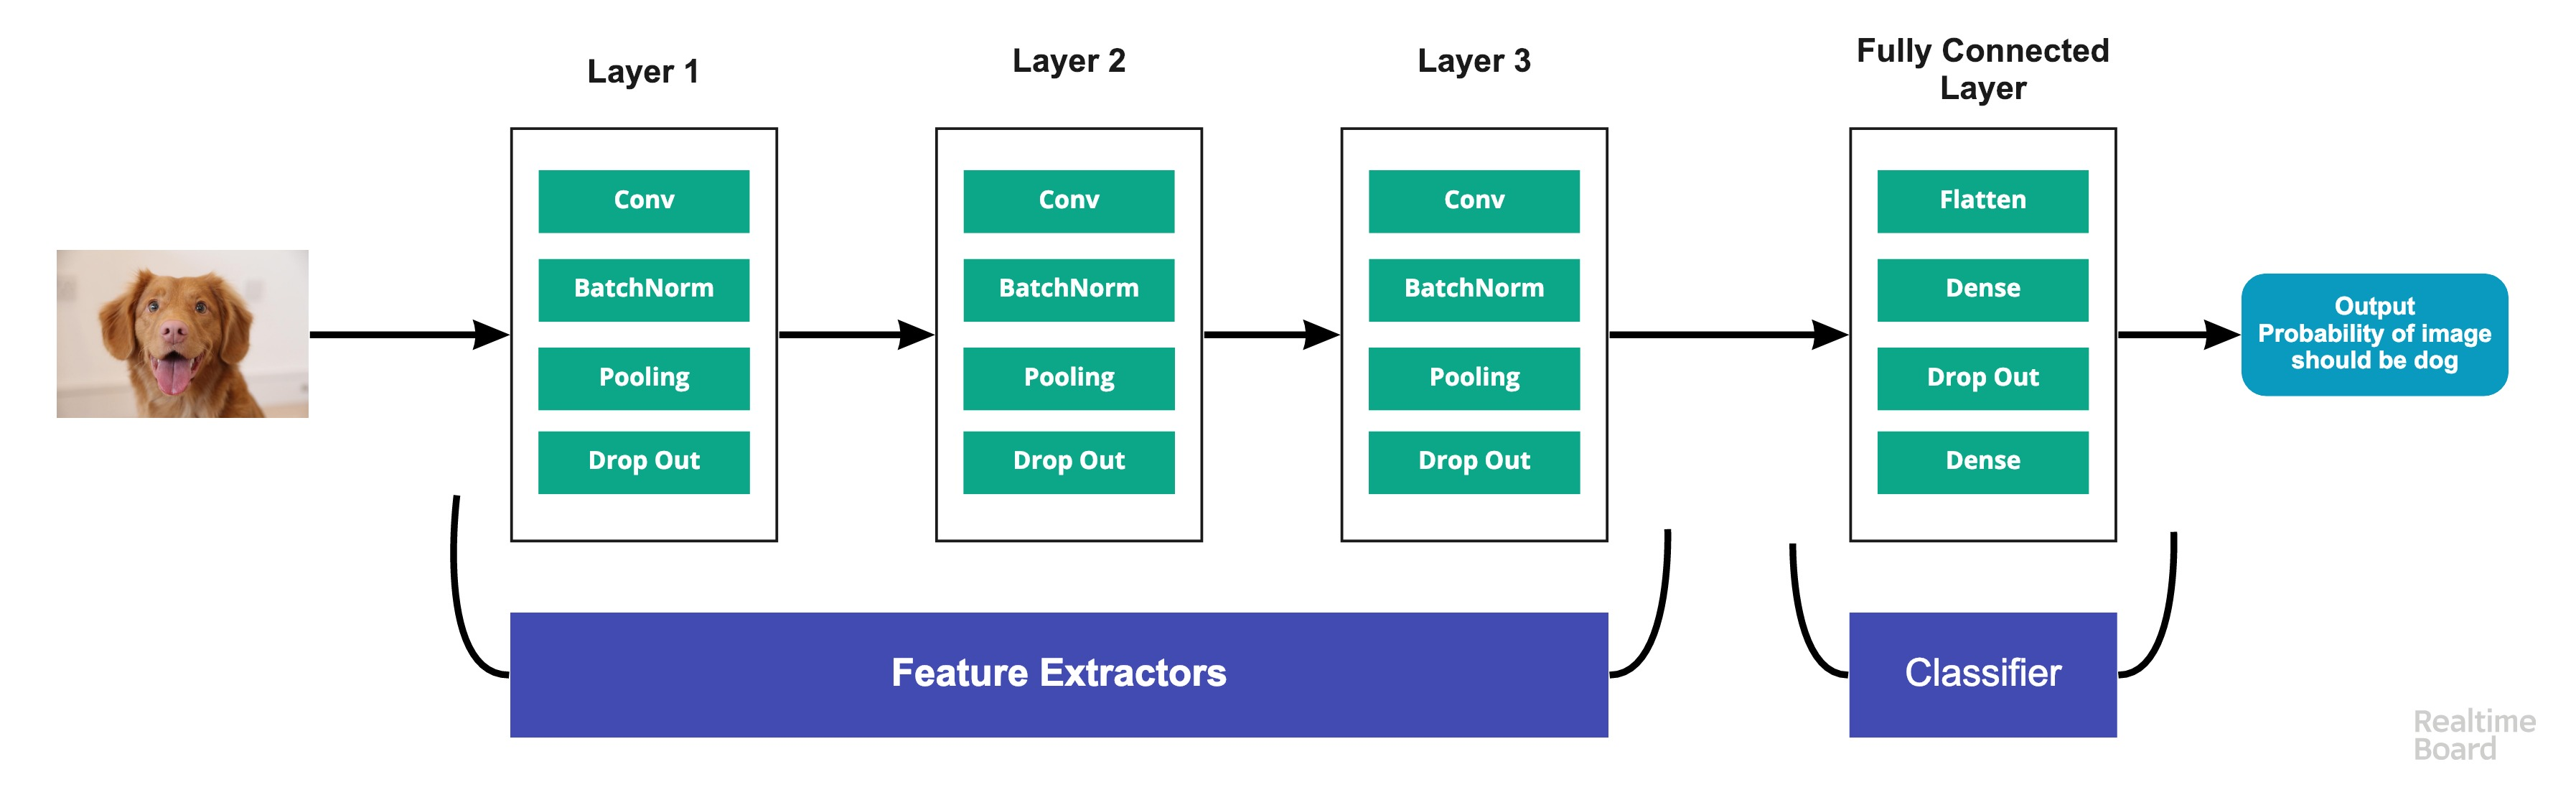
2. Add a Conv2D layer with 32 nodes and kernel size of (3,3). We also experimented with different number of nodes and kernel size. ??????? Also we have to specify input shape which is the X shape. We use 'relu' as activation function. 
3. We add max pooling layer with a size of (2,2) 
4. We add a flatten layer and feed our data to dense layer later.
5. We add the final dense layer with sigmoid activation function.??????
6. Finally we compile the model with the following parameters: Loss, Optimizer, Metrics. 

**Loss** : We used binary_crossentropy to minimize loss.

**Optimizer** : We used gradient decent to optimize the cost function.

**Metrics** : We use accuracy to measure the effectiveness of our model.      

In [7]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(80, 80, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="SGD",
              loss='binary_crossentropy',
              metrics=['accuracy'])

2022-10-28 12:27:56.479781: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 4. Model Training:

Now we train our model using the training data with the following parameters:

Epochs: The number of times our model will go through the entire training data

Batch size: The amount of data pass through the model each time

validation_split: 500 images as mentioned to check for cross-validation error

In [8]:
path_val_cat = "datasets/val/cat"
path_val_dog = "datasets/val/dog"
val_path = "datasets/val"

val_list = os.listdir(path_val_cat) + os.listdir(path_val_dog)

X_val=[]
y_val=[]

for p in val_list:
    category = p.split(".")[0]
    category = convert(category) # convert to 1/0
    img_array = cv2.imread(os.path.join(val_path,p.split(".")[0],p),cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(80, 80)) # resize
    X_val.append(new_img_array)
    y_val.append(category)

X_val = np.array(X_val).reshape(-1, 80,80,1)
X_val = X_val/255.0
y_val = np.array(y_val)

In [10]:
model.fit(X, y, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
625/625 [==============================] - 43s 69ms/step - loss: 0.6906 - accuracy: 0.5382 - val_loss: 0.6883 - val_accuracy: 0.5724
Epoch 2/10
625/625 [==============================] - 47s 75ms/step - loss: 0.6842 - accuracy: 0.5728 - val_loss: 0.6810 - val_accuracy: 0.5772
Epoch 3/10
625/625 [==============================] - 45s 72ms/step - loss: 0.6741 - accuracy: 0.5846 - val_loss: 0.6819 - val_accuracy: 0.5596
Epoch 4/10
625/625 [==============================] - 47s 75ms/step - loss: 0.6625 - accuracy: 0.6037 - val_loss: 0.6741 - val_accuracy: 0.5672
Epoch 5/10
625/625 [==============================] - 46s 74ms/step - loss: 0.6509 - accuracy: 0.6202 - val_loss: 0.6434 - val_accuracy: 0.6340
Epoch 6/10
625/625 [==============================] - 48s 76ms/step - loss: 0.6386 - accuracy: 0.6320 - val_loss: 0.6325 - val_accuracy: 0.6438
Epoch 7/10
625/625 [==============================] - 48s 77ms/step - loss: 0.6287 - accuracy: 0.6475 - val_loss: 0.6245 - val_accuracy:

### 5. Prediction:

We now use the trained model to classify the test dataset.

In [21]:
test_path = "datasets/test"
test_list = os.listdir(test_path)
X_test=[]
id_line=[]
for p in test_list:
    img_array = cv2.imread(os.path.join(test_path,p),cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(80, 80)) # resize
    X_test.append(new_img_array)
    id_line.append(int(p.split(".")[0]))
X_test = np.array(X_test).reshape(-1, 80,80,1)
X_test = X_test/255.0

In [22]:
predictions = model.predict(X_test)
predicted_val = [int(round(p[0])) for p in predictions]

16/16 [==============================] - 0s 25ms/step


We finalize the model output and write it into csv file.

In [26]:
submission_df = pd.DataFrame({'id':id_line, 'label':predicted_val})
submission_df = submission_df.sort_values('id')
submission_df.to_csv("submission.csv", index=False)